In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Polygon, Point
import pyproj
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


bsas_map = gpd.read_file('../gopa_data/barrios-ciudad')
coordinates = pd.read_csv('../raw_data/coordinates_data.csv')

In [2]:
bsas_map.head(5)

,BARRIO,COMUNA,GEOJSON,geometry
0,CHACARITA,15.0,"{""type"":""MultiPolygon"",""coordinates"":[[[[-58.4...","POLYGON ((-58.45282 -34.59599, -58.45366 -34.5..."
1,PATERNAL,15.0,"{""type"":""MultiPolygon"",""coordinates"":[[[[-58.4...","POLYGON ((-58.46558 -34.59656, -58.46562 -34.5..."
2,VILLA CRESPO,15.0,"{""type"":""MultiPolygon"",""coordinates"":[[[[-58.4...","POLYGON ((-58.42375 -34.59783, -58.42495 -34.5..."
3,VILLA DEL PARQUE,11.0,"{""type"":""MultiPolygon"",""coordinates"":[[[[-58.4...","POLYGON ((-58.49461 -34.61487, -58.49479 -34.6..."
4,ALMAGRO,5.0,"{""type"":""MultiPolygon"",""coordinates"":[[[[-58.4...","POLYGON ((-58.41287 -34.61412, -58.41282 -34.6..."


In [17]:
barrio = 'PUERTO MADERO'
df_barrio = bsas_map[bsas_map['BARRIO'] == barrio]
df_barrio

,BARRIO,COMUNA,GEOJSON,geometry
50,PUERTO MADERO,1.0,"{""type"":""MultiPolygon"",""coordinates"":[[[[-58.3...","POLYGON ((-58.35732 -34.59509, -58.35729 -34.5..."


In [18]:
coordinates.drop(columns='geometry', inplace=True)
gpd_data = gpd.GeoDataFrame(coordinates,
                         geometry = gpd.points_from_xy(coordinates.search_longitude, coordinates.search_latitude))
gpd_data.head()

,search_longitude,search_latitude,arrive,leave,search_method,timestamp,uid,x,y,new_x,new_y,arrive_date,dayOfWeek,reservas_barrio,geometry
0,-58.440447,-34.620694,2021-02-28 15:56:00+00:00,2021-02-28 17:32:00+00:00,google,2021-01-31T19:35:42.438-03:00,NaN,-58.440447,-34.620694,0.097696,0.084863,2021-02-28,6,False,POINT (-58.44045 -34.62069)
1,-58.418288,-34.581668,2021-02-13 15:12:45.668000+00:00,2021-02-13 16:12:45.668000+00:00,searchInThisArea,2021-02-13T12:13:03.714-03:00,e8itgepSU1YX6Q48HtrDpz76OXr1,-58.418288,-34.581668,0.119855,0.123889,2021-02-13,5,False,POINT (-58.41829 -34.58167)
2,-58.208933,-34.831096,2021-01-25 17:45:27.320000+00:00,2021-01-25 18:45:27.320000+00:00,searchInThisArea,2021-01-25T14:45:44.753-03:00,NaN,-58.208933,-34.831096,0.329210,-0.125539,2021-01-25,0,False,POINT (-58.20893 -34.83110)
3,-58.454943,-34.564354,2021-02-25 11:20:09.755000+00:00,2021-02-25 12:20:09.755000+00:00,searchInThisArea,2021-02-25T08:22:32.254-03:00,NaN,-58.454943,-34.564354,0.083200,0.141203,2021-02-25,3,False,POINT (-58.45494 -34.56435)
4,-58.451924,-34.559296,2020-09-17 10:45:00+00:00,2020-09-17 11:00:00+00:00,update_time_home,2020-09-17T08:13:03.302GMT-03:00,unauthenticated,-58.451924,-34.559296,0.086219,0.146261,2020-09-17,3,False,POINT (-58.45192 -34.55930)


In [19]:
reservas_bsas = gpd_data[['geometry']]
reservas_barrio = reservas_bsas.within(df_barrio)
cond_reservas_barrio = gpd_data.apply(lambda x: df_barrio.contains(x.geometry), axis=1)
gpd_data['reservas_barrio'] = cond_reservas_barrio
gpd_data = gpd_data[gpd_data.reservas_barrio == True]



In [20]:
reservas_bsas = reservas_bsas.set_crs("EPSG:4326")
reservas_bsas.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [21]:
df_barrio.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

(-34.7, -34.525)

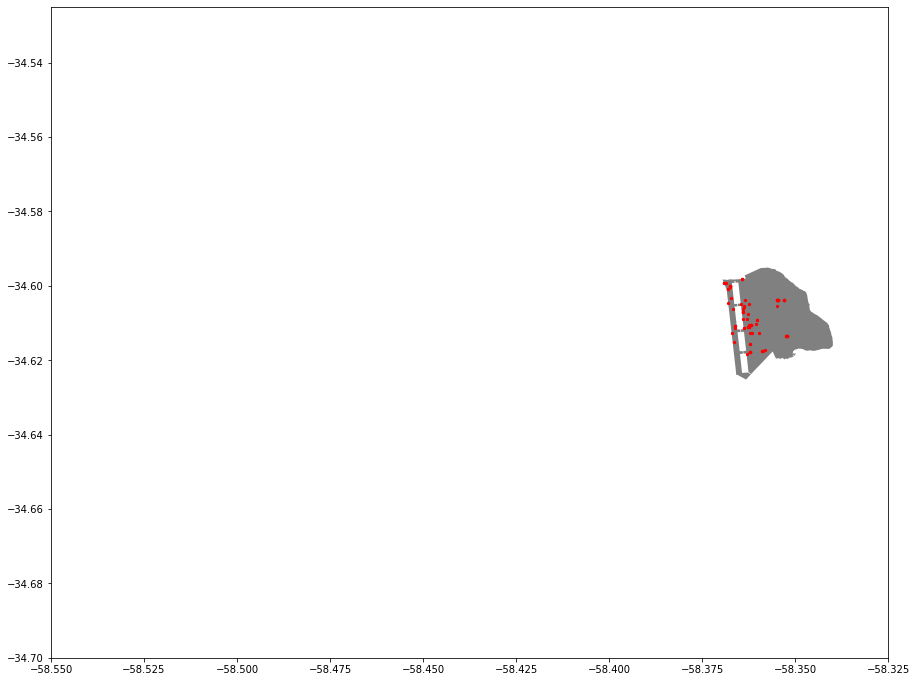

In [22]:
fig,ax = plt.subplots(figsize = (15,16))
df_barrio.plot(ax=ax, color='grey')
gpd_data.plot(ax=ax, markersize=5, color='red')
ax.set_xlim([-58.550, -58.325])
ax.set_ylim([-34.700, -34.525])